In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
test = pd.read_csv('datas/test.csv')
train = pd.read_csv('datas/train.csv')
sample = pd.read_csv('datas/sample_submission.csv')
urunler = pd.read_excel("datas/Urunözellikleri.xlsx")

C:\Users\Diablo\AppData\Local\Temp\ipykernel_19480\1772227058.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('datas/test.csv')
C:\Users\Diablo\AppData\Local\Temp\ipykernel_19480\1772227058.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('datas/train.csv')


In [3]:
test.head()

,MUSTERI_ID,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...,KASIM,2,467,Öğretmen,103,1,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,100
1,7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...,KASIM,1,658,Öğretmen,106,1,54.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,111
2,47498c1c6161aea484b0eed7997846919ca9287684aee4...,KASIM,1,634,Serbest Meslek,106,1,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,127
3,48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...,KASIM,2,638,NaN,106,1,67.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,178
4,26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...,KASIM,1,80,Öğrenci,106,1,34.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,3


In [4]:
test.columns

Index(['MUSTERI_ID', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI',
       

In [5]:
test.dtypes

MUSTERI_ID             object
FLAG                   object
PP_CINSIYET             int64
PP_YAS                  int64
PP_MESLEK              object
                        ...  
HU16                    int64
HU17                    int64
HU18                    int64
HU19                    int64
AKTIF_ILK_POLICE_RG     int64
Length: 96, dtype: object

In [6]:
# bruada verilerimizdeki özniteliklerin kaç tane eşsiz değer olduğuna bakıcaz
for col in train.columns:
    if col == "LABEL":
        continue
    else:
        print(col, len(test[col].unique()))

MUSTERI_ID 195631
FLAG 2
PP_CINSIYET 2
PP_YAS 1061
PP_MESLEK 115
PP_MUSTERI_SEGMENTI 6
PP_UYRUK 3
IL 83
SORU_YATIRIM_KARAKTERI_CVP 6
SORU_YATIRIM_KARAKTERI_RG 54
SORU_MEDENI_HAL_CVP 7
SORU_MEDENI_HAL_RG 251
SORU_EGITIM_CVP 8
SORU_EGITIM_RG 251
SORU_GELIR_CVP 1788
SORU_GELIR_RG 251
SORU_COCUK_SAYISI_CVP 13
SORU_COCUK_SAYISI_RG 172
BES_AYRILMA_TALEP_ADET 8
ODEMEME_TALEP_ADET 4
HAYAT_AYRILMA_TALEP_ADET 5
BILGI_TALEP_ADET 8
VADE_TUTAR_0 4843
ODEME_TUTAR_0 3746
VADE_TUTAR_1 3877
ODEME_TUTAR_1 3406
VADE_TUTAR_2 3725
ODEME_TUTAR_2 3264
VADE_TUTAR_3 3672
ODEME_TUTAR_3 3218
VADE_TUTAR_4 3498
ODEME_TUTAR_4 3089
VADE_TUTAR_5 3338
ODEME_TUTAR_5 2946
VADE_TUTAR_6 3416
ODEME_TUTAR_6 3003
VADE_TUTAR_7 3271
ODEME_TUTAR_7 2896
VADE_TUTAR_8 3222
ODEME_TUTAR_8 2870
VADE_TUTAR_9 3192
ODEME_TUTAR_9 2851
VADE_TUTAR_10 2989
ODEME_TUTAR_10 2688
VADE_TUTAR_11 2478
ODEME_TUTAR_11 2236
SON_AY_KATKI_MIKTARI 118
SON_AY_KATKI_ADET 8
SON_CEYREK_KATKI_MIKTARI 462
SON_CEYREK_KATKI_ADET 23
SON_SENE_KATKI_MIKTARI 1003
S

In [17]:
train["SORU_GELIR_CVP"].head()

0     NaN
1    7500
2     NaN
3       1
4    1500
Name: SORU_GELIR_CVP, dtype: object

In [18]:
for col in train.columns:
    if col == "LABEL":
        continue
    if col == "MUSTERI_ID":
        continue
    else:
        print(col)
        essizDeger = len(test[col].unique())
        if essizDeger < 1000:
            train[col] = train[col].astype("category")
        else:
            try:
                train[col] = train[col].astype("float")
            except:
                continue
            

FLAG
PP_CINSIYET
PP_YAS
PP_MESLEK
PP_MUSTERI_SEGMENTI
PP_UYRUK
IL
SORU_YATIRIM_KARAKTERI_CVP
SORU_YATIRIM_KARAKTERI_RG
SORU_MEDENI_HAL_CVP
SORU_MEDENI_HAL_RG
SORU_EGITIM_CVP
SORU_EGITIM_RG
SORU_GELIR_CVP
SORU_GELIR_RG
SORU_COCUK_SAYISI_CVP
SORU_COCUK_SAYISI_RG
BES_AYRILMA_TALEP_ADET
ODEMEME_TALEP_ADET
HAYAT_AYRILMA_TALEP_ADET
BILGI_TALEP_ADET
VADE_TUTAR_0
ODEME_TUTAR_0
VADE_TUTAR_1
ODEME_TUTAR_1
VADE_TUTAR_2
ODEME_TUTAR_2
VADE_TUTAR_3
ODEME_TUTAR_3
VADE_TUTAR_4
ODEME_TUTAR_4
VADE_TUTAR_5
ODEME_TUTAR_5
VADE_TUTAR_6
ODEME_TUTAR_6
VADE_TUTAR_7
ODEME_TUTAR_7
VADE_TUTAR_8
ODEME_TUTAR_8
VADE_TUTAR_9
ODEME_TUTAR_9
VADE_TUTAR_10
ODEME_TUTAR_10
VADE_TUTAR_11
ODEME_TUTAR_11
SON_AY_KATKI_MIKTARI
SON_AY_KATKI_ADET
SON_CEYREK_KATKI_MIKTARI
SON_CEYREK_KATKI_ADET
SON_SENE_KATKI_MIKTARI
SON_SENE_KATKI_ADET
ANAPARA
GETIRI
BU01
BU02
BU03
BU04
BU05
BU06
BU07
BU08
BU09
BU10
BU11
BU12
BU13
BU14
BU15
BU16
BU17
BU18
BU19
BU20
BU21
BU22
BU23
BU24
HU01
HU02
HU03
HU04
HU05
HU06
HU07
HU10
HU11
HU12
HU13
HU14
HU1

In [21]:
def descriptiveStatistics(data, feautue):
    dataDtype = data[feautue].dtype
    print("Değişkenimizin Açıklayıvıc İstatistikleri:")
    print(data[feautue].describe())
    if dataDtype == 'category':
        print("\n")
        print("Değişkenimizin Sınıf Frekansları:")
        print(data[feautue].value_counts())
    
    print("\n")
    print("Değişkenimizde ki toplam eksik değerler: ")
    print(data[feautue].isna().sum())
    

In [45]:
def dataVisualization(data, feature):
    dataDtype = data[feature].dtype
    if dataDtype == "category":
        plt.figure(figsize=(8,8))
        data[feature].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(feature + " Değişkeninin Pasta Grafiği")
        plt.show()
        # ********************
        plt.figure(figsize=(10,6))
        sns.countplot(data[feature])
        plt.title(feature + " Değişkeninin Sınıf Frekansları")
        plt.show()
        
    else:
        plt.figure(figsize=(10,6))
        sns.histplot(data[feature], kde=True)
        plt.title(feature + " Değişkeninin Dağılım Grafiği")
        plt.show()
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(y = data[feature])
        plt.title(feature + " Değişkeninin Kutu Grafiği")
        plt.show()
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="LABEL", y=feature, data=data)
        plt.title(feature + " Değişkeninin Target değişkenine göre gruplanmış kutu grafiği")
        plt.show()

        

In [46]:
#LABEL

In [47]:
descriptiveStatistics(train, "LABEL")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         8
top           UA
freq      832770
Name: LABEL, dtype: object


Değişkenimizde ki toplam eksik değerler: 
0


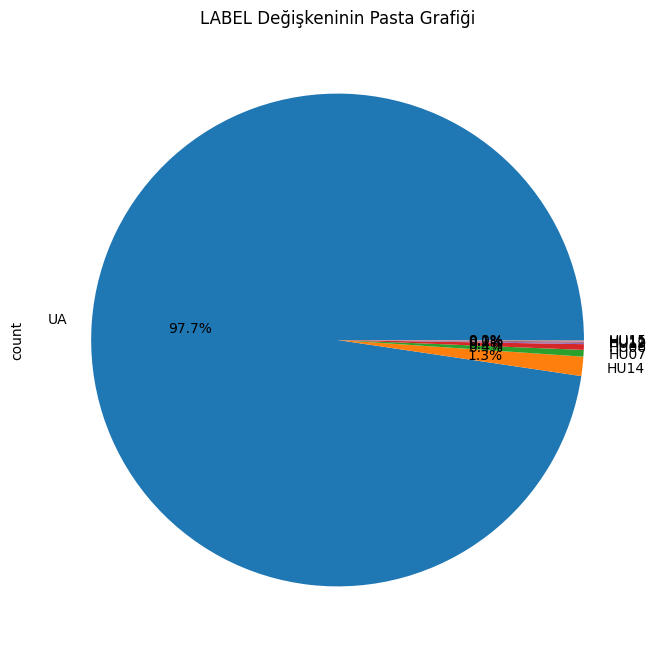

In [48]:
plt.figure(figsize=(8,8))
train["LABEL"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("LABEL Değişkeninin Pasta Grafiği")
plt.show()

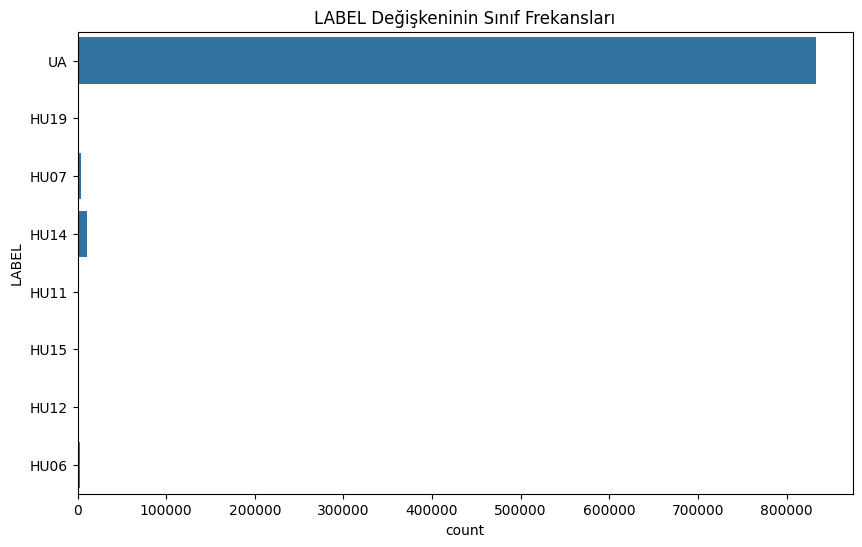

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(train["LABEL"])
plt.title("LABEL Değişkeninin Sınıf Frekansları")
plt.show()

In [50]:
# FLAG

In [51]:
descriptiveStatistics(train, "FLAG")

Değişkenimizin Açıklayıvıc İstatistikleri:
count      852719
unique          6
top       HAZIRAN
freq       252193
Name: FLAG, dtype: object


Değişkenimizin Sınıf Frekansları:
FLAG
HAZIRAN    252193
MAYIS      246389
EKIM        93766
EYLUL       89170
TEMMUZ      86460
AGUSTOS     84741
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


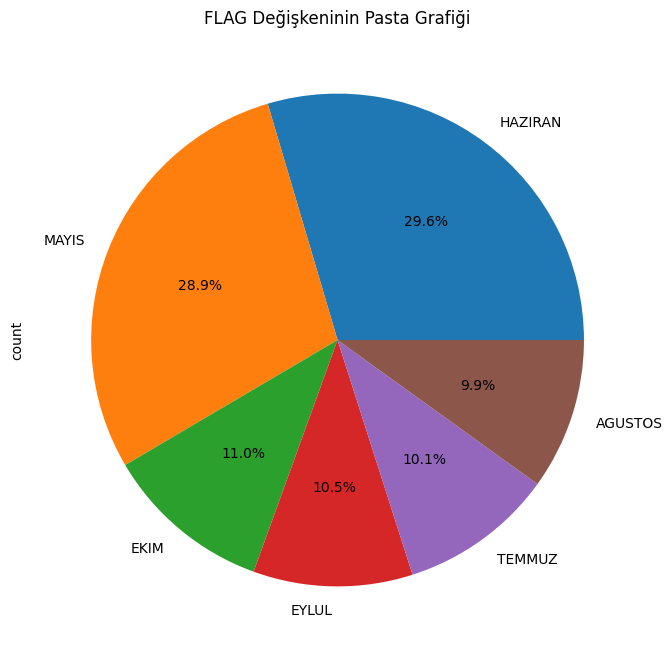

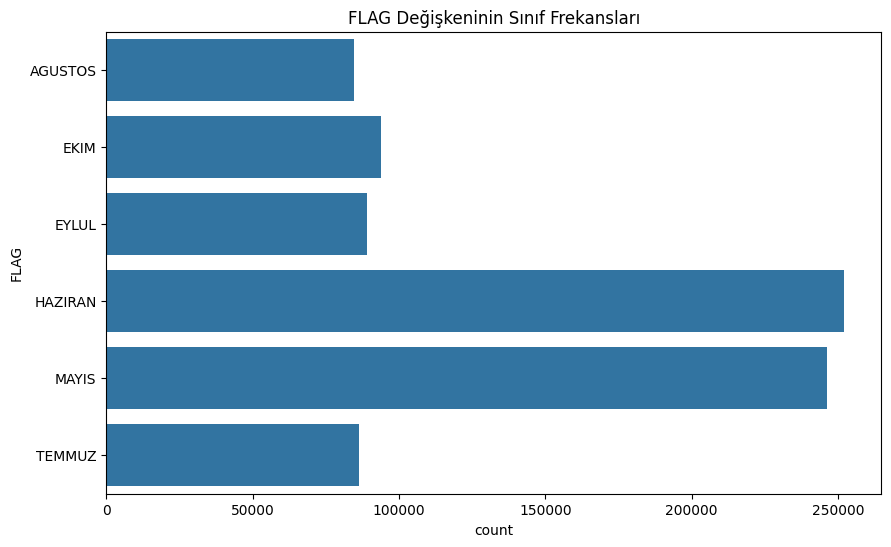

In [52]:
dataVisualization(train, "FLAG")

In [53]:
# PP_CINSIYET

In [54]:
descriptiveStatistics(train, "PP_CINSIYET")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         2
top            1
freq      431283
Name: PP_CINSIYET, dtype: int64


Değişkenimizin Sınıf Frekansları:
PP_CINSIYET
1    431283
2    421436
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


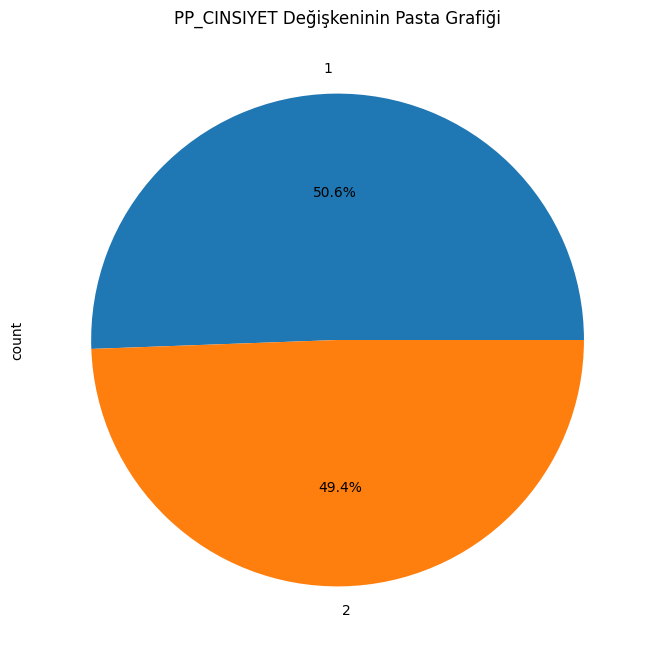

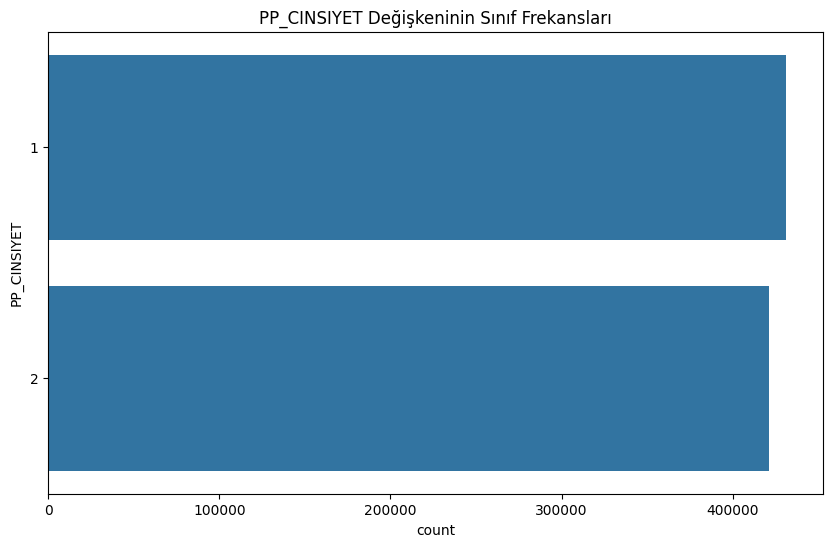

In [55]:
dataVisualization(train, "PP_CINSIYET")

In [56]:
#PP_YAS

In [57]:
descriptiveStatistics(train, "PP_YAS")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    852719.000000
mean        440.773115
std         205.058165
min           0.000000
25%         316.000000
50%         470.000000
75%         585.000000
max        1474.000000
Name: PP_YAS, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
0


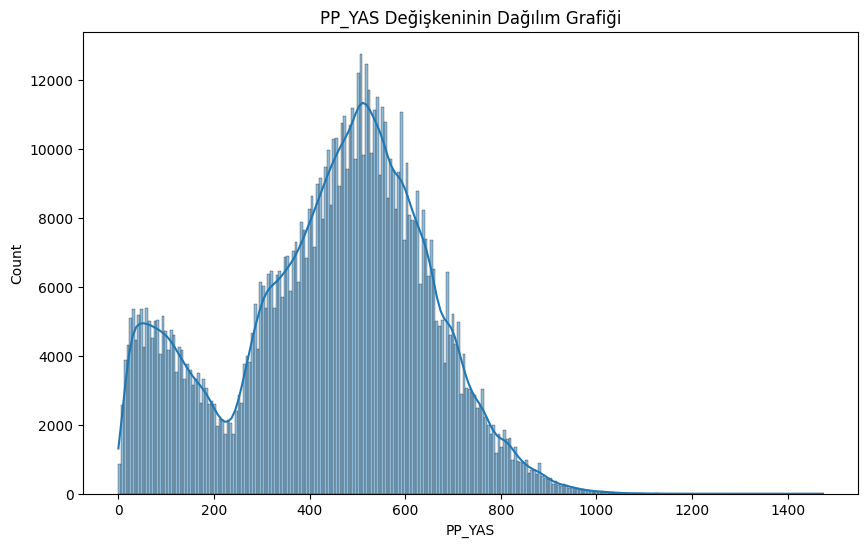

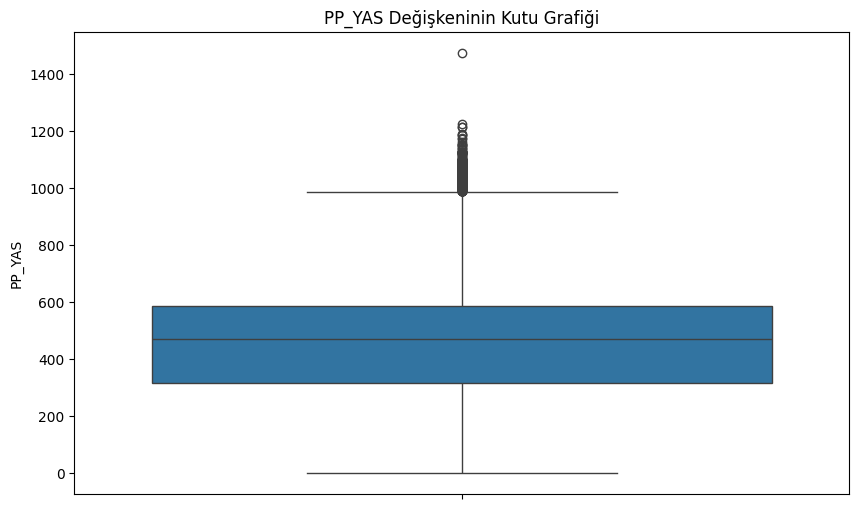

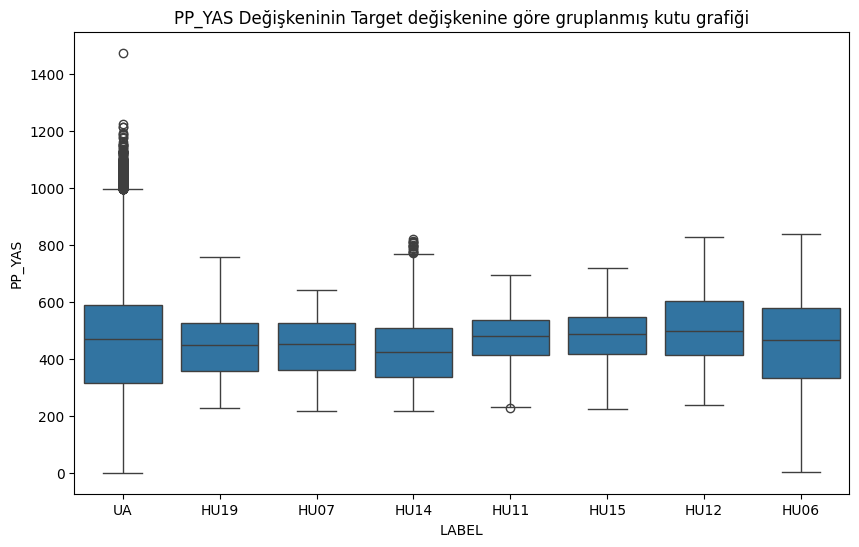

In [58]:
dataVisualization(train, "PP_YAS")

In [59]:
# PP_MESLEK

In [60]:
descriptiveStatistics(train, "PP_MESLEK")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     764099
unique       114
top         İşçi
freq      138034
Name: PP_MESLEK, dtype: object


Değişkenimizin Sınıf Frekansları:
PP_MESLEK
İşçi                    138034
Öğrenci                 102557
Ev Hanımı               102011
Diğer                    97803
Öğretmen                 33926
                         ...  
Yönetim Kurulu Üyesi        36
Yazar                       31
Balıkçı                     23
Amiral                       8
Şair                         7
Name: count, Length: 114, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
88620


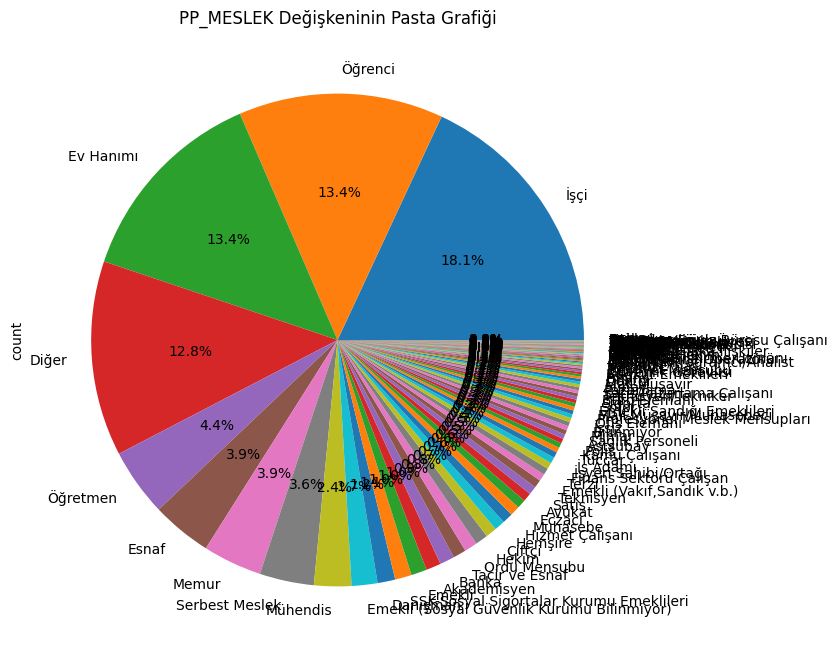

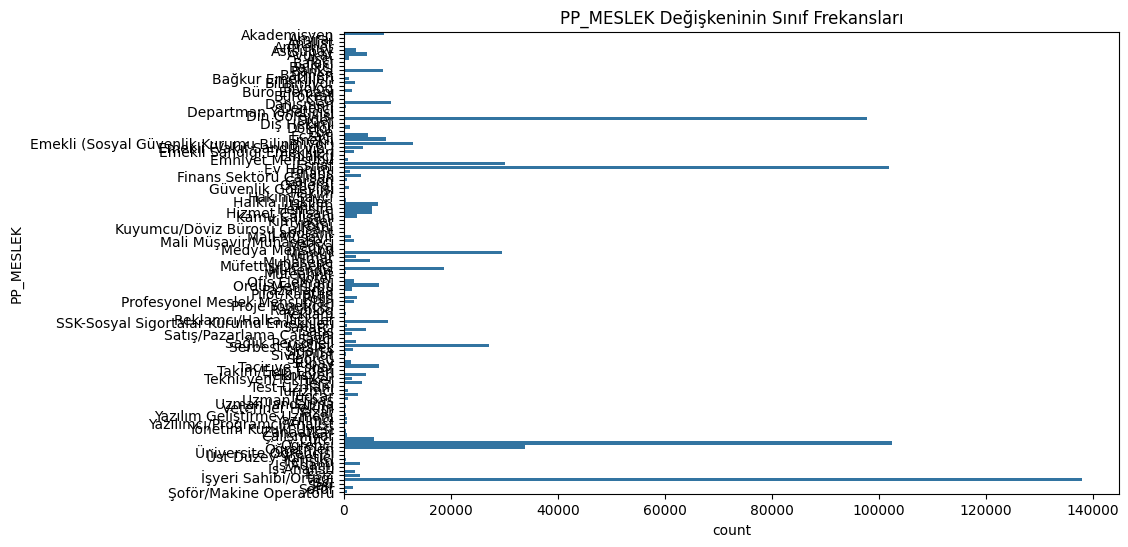

In [61]:
dataVisualization(train, "PP_MESLEK")

In [62]:
# PP_MUSTERI_SEGMENTASYON

In [64]:
train.columns

Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI'

In [65]:
descriptiveStatistics(train, "PP_MUSTERI_SEGMENTI")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         6
top          106
freq      370063
Name: PP_MUSTERI_SEGMENTI, dtype: int64


Değişkenimizin Sınıf Frekansları:
PP_MUSTERI_SEGMENTI
106    370063
105    196927
102    107096
104     89176
103     88645
101       812
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


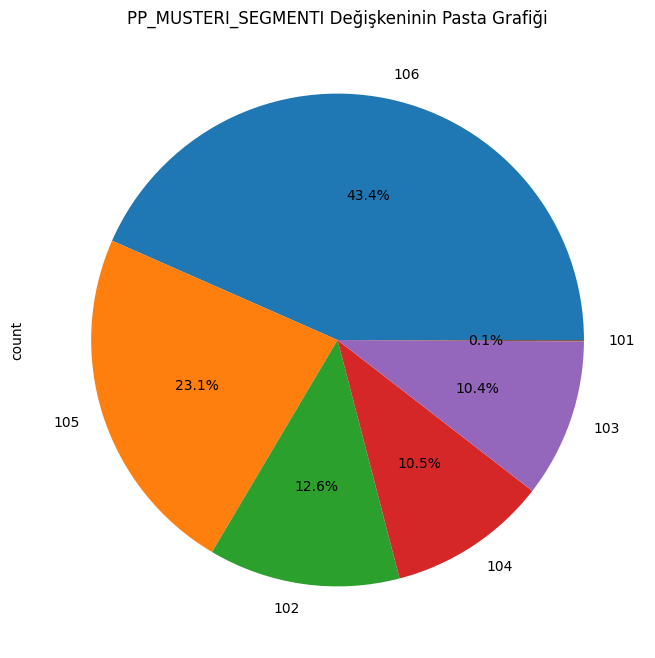

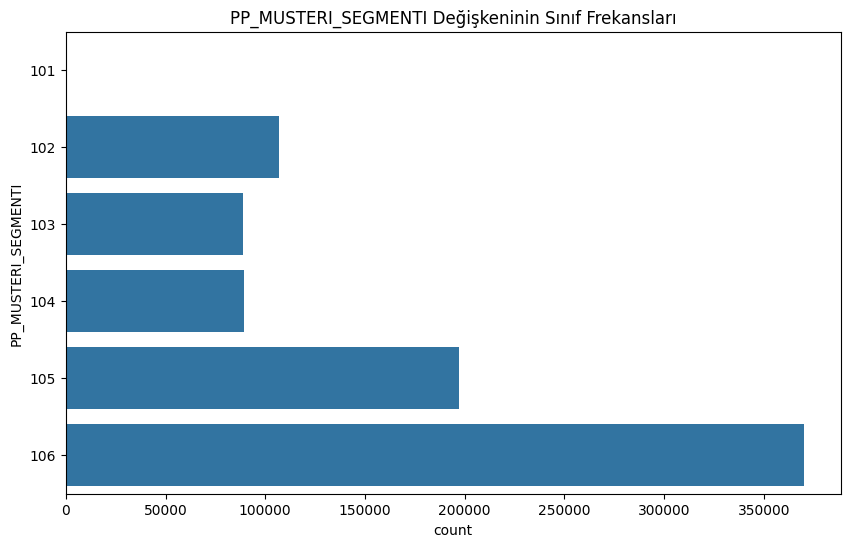

In [66]:
dataVisualization(train, "PP_MUSTERI_SEGMENTI")

In [67]:
# PP_UYRUK

In [68]:
descriptiveStatistics(train, "PP_UYRUK")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         3
top            1
freq      848335
Name: PP_UYRUK, dtype: int64


Değişkenimizin Sınıf Frekansları:
PP_UYRUK
1    848335
2      2570
3      1814
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


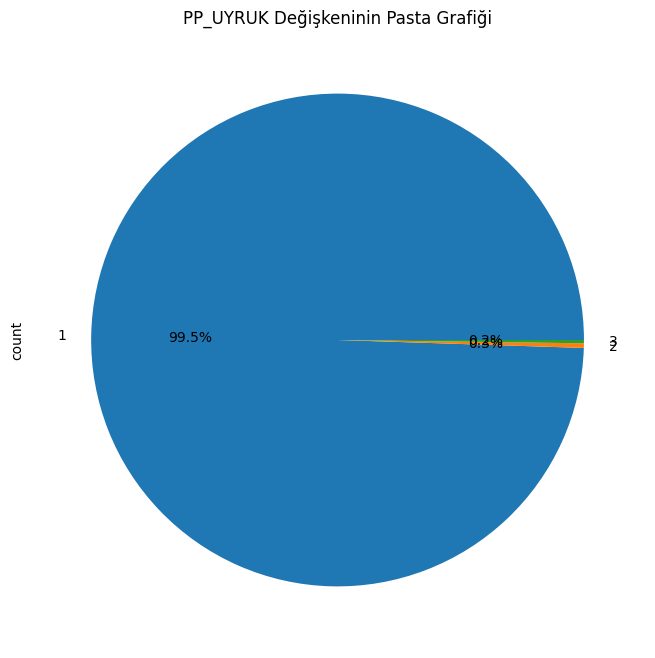

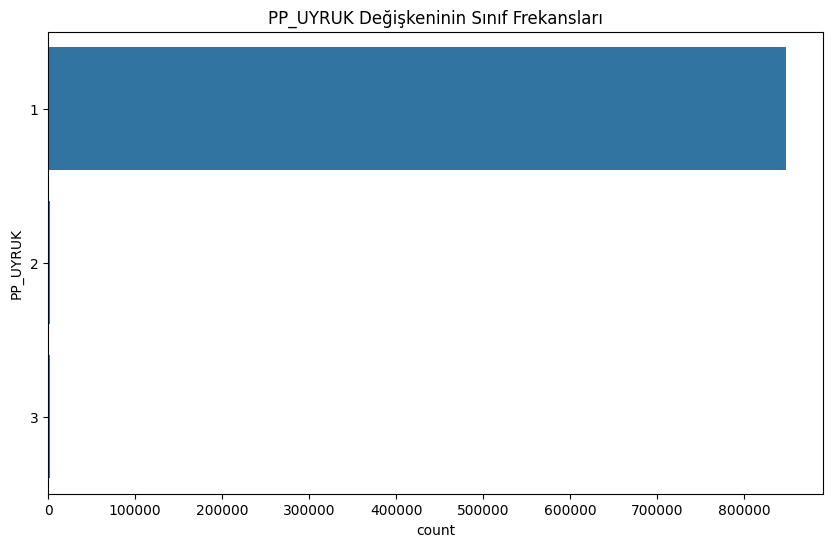

In [69]:
dataVisualization(train, "PP_UYRUK")

In [70]:
# IL

In [71]:
descriptiveStatistics(train, "IL")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique        82
top           34
freq      204550
Name: IL, dtype: int64


Değişkenimizin Sınıf Frekansları:
IL
34    204550
6      86350
35     62271
7      36034
16     30983
       ...  
62       813
56       792
29       776
75       615
69       500
Name: count, Length: 82, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


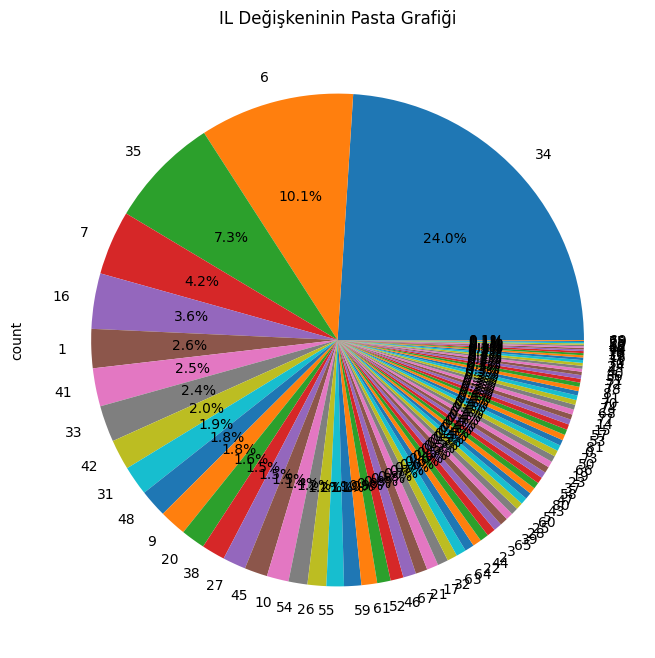

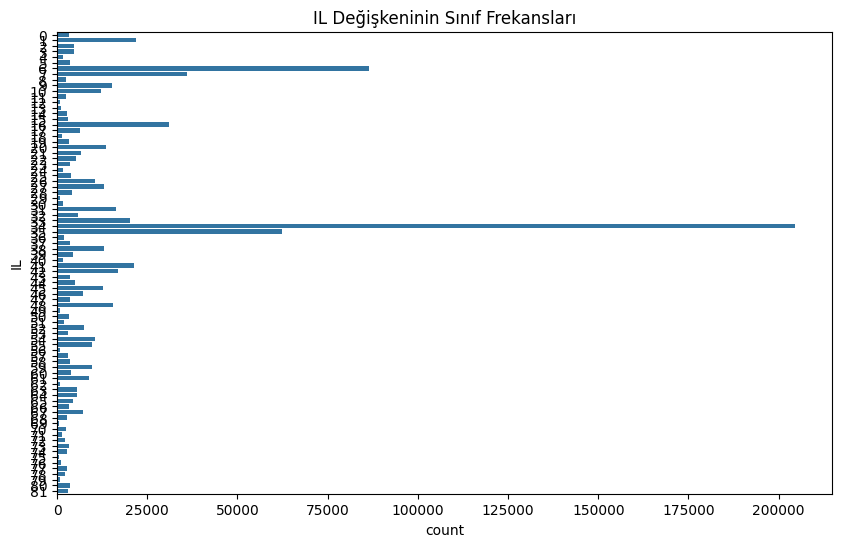

In [72]:
dataVisualization(train, "IL")

In [73]:
# SORU_MEDENI_HAL_CVP

In [74]:
descriptiveStatistics(train, "SORU_MEDENI_HAL_CVP")

Değişkenimizin Açıklayıvıc İstatistikleri:
count      850939
unique          7
top       Married
freq       476413
Name: SORU_MEDENI_HAL_CVP, dtype: object


Değişkenimizin Sınıf Frekansları:
SORU_MEDENI_HAL_CVP
Married               476413
Single                342321
Divorced               25346
Widowed                 6837
Other                     14
Marriage Cancelled         6
Marriage Annulled          2
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
1780


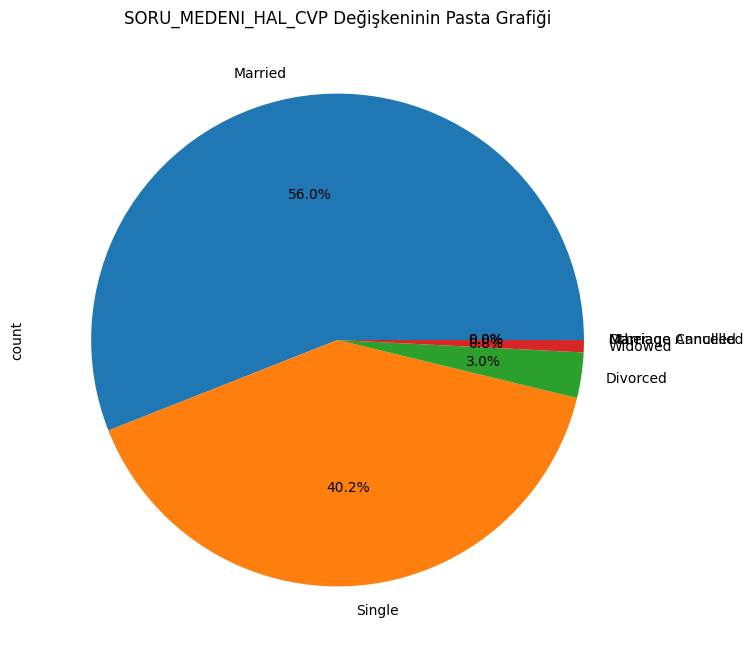

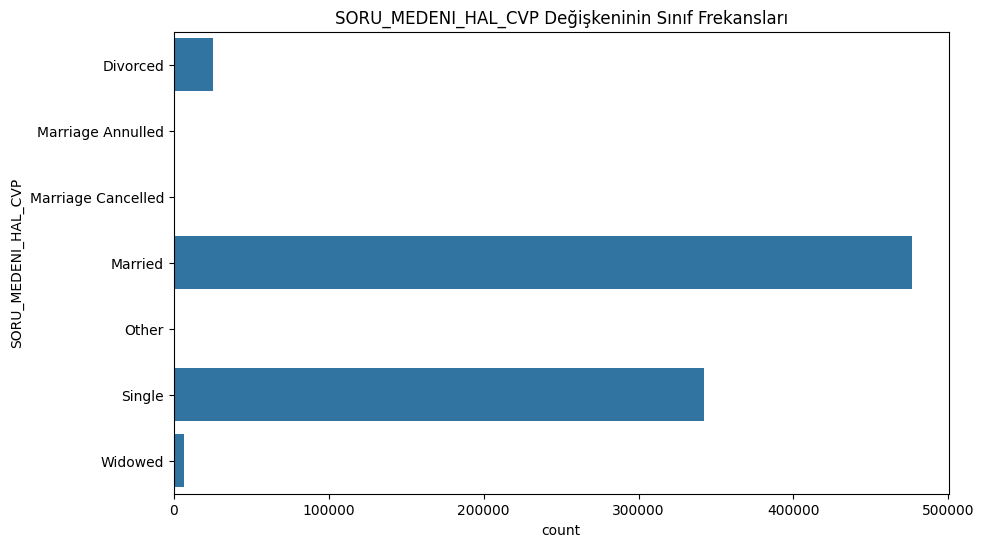

In [75]:
dataVisualization(train, "SORU_MEDENI_HAL_CVP")

In [76]:
# SORU_EGITIM_CVP

In [77]:
descriptiveStatistics(train, "SORU_EGITIM_CVP")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     725624
unique         7
top         Lise
freq      240689
Name: SORU_EGITIM_CVP, dtype: object


Değişkenimizin Sınıf Frekansları:
SORU_EGITIM_CVP
Lise             240689
Lisans           212010
(Diğer)          136355
İlköğretim        97849
Yüksek Lisans     19113
Önlisans          15851
Doktora            3757
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
127095


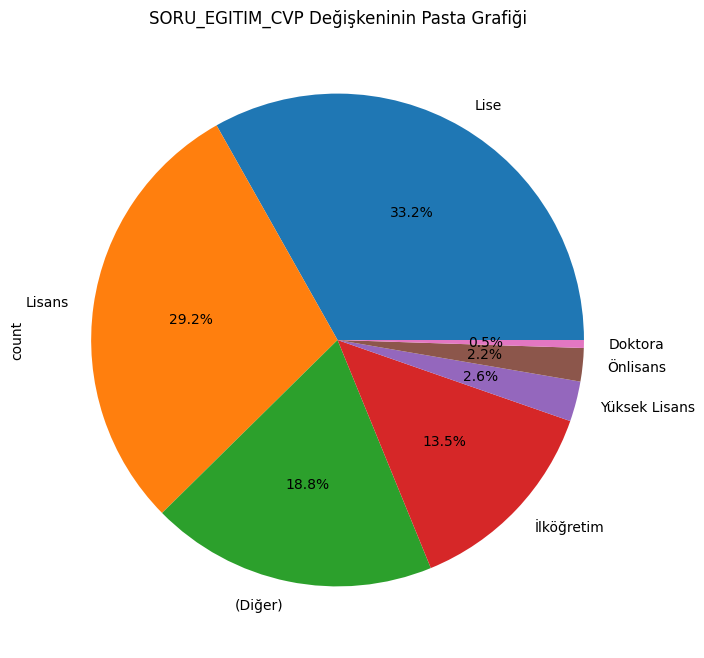

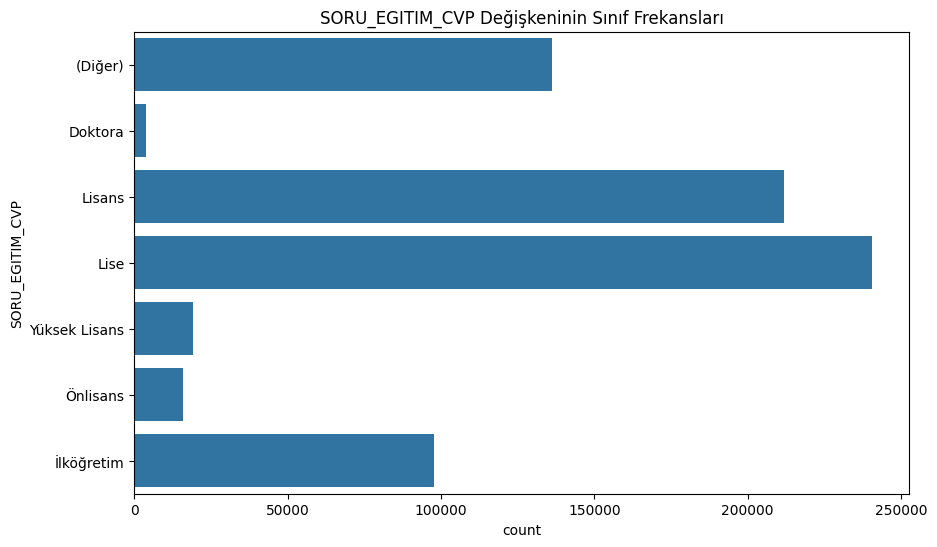

In [78]:
dataVisualization(train, "SORU_EGITIM_CVP")

In [79]:
# SORU_GELIR_CVP

In [80]:
descriptiveStatistics(train, "SORU_GELIR_CVP")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     574817
unique      4128
top            0
freq       64686
Name: SORU_GELIR_CVP, dtype: object


Değişkenimizde ki toplam eksik değerler: 
277902


In [84]:
#SORU_GELIR_RG

In [85]:
descriptiveStatistics(train, "SORU_GELIR_RG")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     574817.0
unique       262.0
top          235.0
freq        8768.0
Name: SORU_GELIR_RG, dtype: float64


Değişkenimizin Sınıf Frekansları:
SORU_GELIR_RG
235.0    8768
234.0    8540
96.0     6172
97.0     5864
95.0     5797
         ... 
285.0       1
260.0       1
258.0       1
252.0       1
247.0       1
Name: count, Length: 262, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
277902


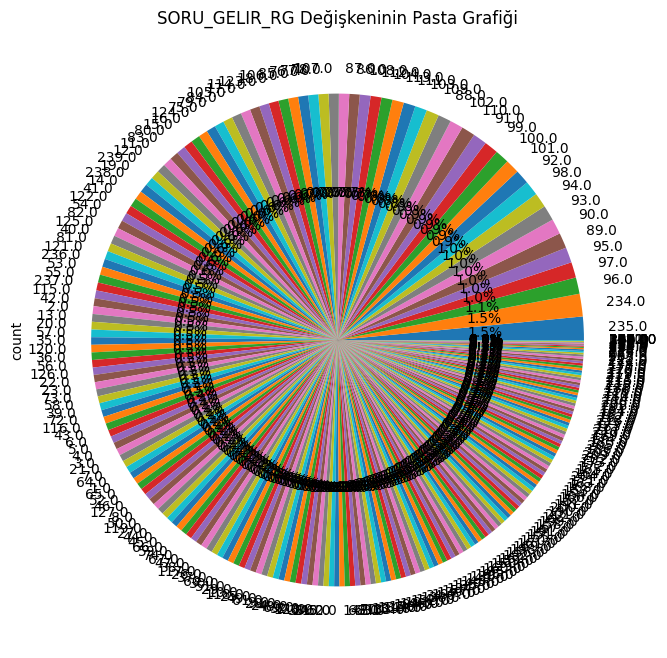

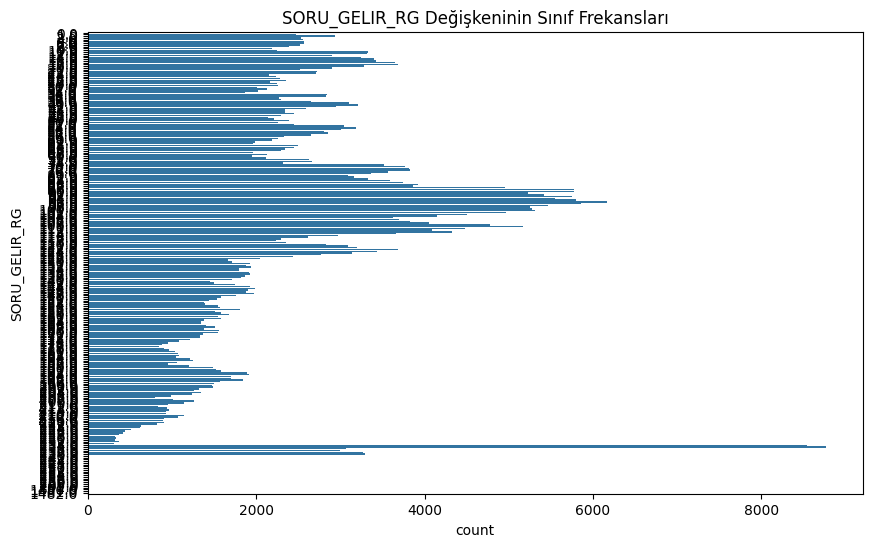

In [86]:
dataVisualization(train, "SORU_GELIR_RG")

In [87]:
# SORU_COCUK_SAYISI_CVP

In [88]:
descriptiveStatistics(train, "SORU_COCUK_SAYISI_CVP")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     436159.0
unique        16.0
top            0.0
freq      411051.0
Name: SORU_COCUK_SAYISI_CVP, dtype: float64


Değişkenimizin Sınıf Frekansları:
SORU_COCUK_SAYISI_CVP
0.0       411051
2.0        10765
1.0        10240
3.0         2925
4.0          757
5.0          259
6.0           90
7.0           36
8.0           19
10.0           8
9.0            3
11.0           2
14.0           1
20.0           1
21.0           1
3000.0         1
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
416560


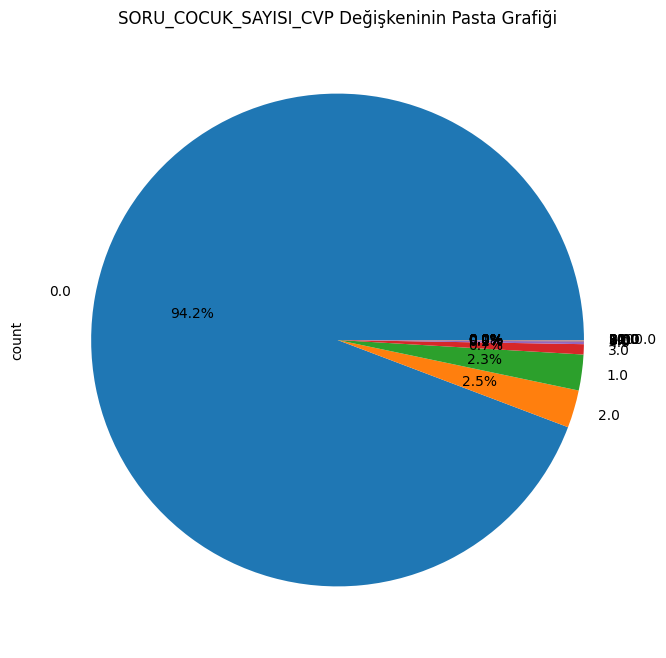

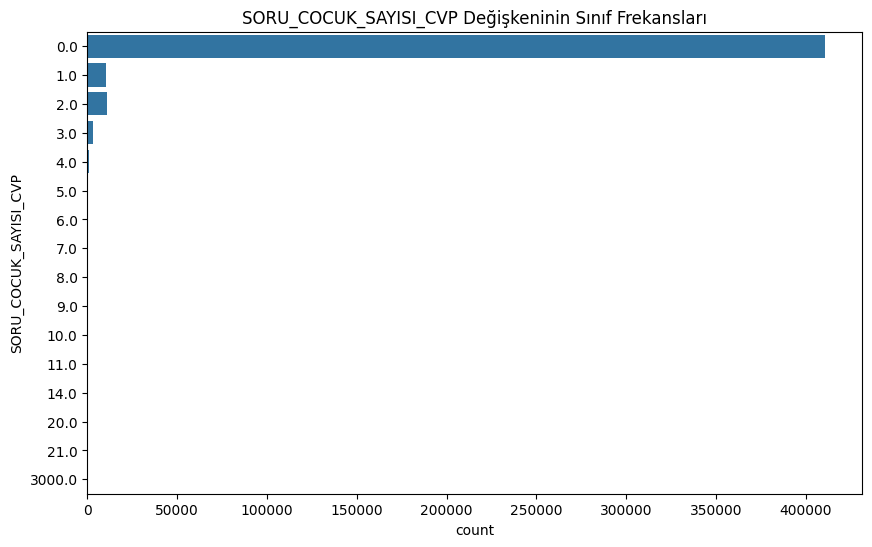

In [89]:
dataVisualization(train, "SORU_COCUK_SAYISI_CVP")

In [90]:
# SORU_COCUK_SAYISI_RG

In [91]:
descriptiveStatistics(train, "SORU_COCUK_SAYISI_RG")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     436159.0
unique       189.0
top          235.0
freq       14347.0
Name: SORU_COCUK_SAYISI_RG, dtype: float64


Değişkenimizin Sınıf Frekansları:
SORU_COCUK_SAYISI_RG
235.0    14347
234.0    14023
96.0      6527
97.0      6266
95.0      6135
         ...  
256.0        1
285.0        1
292.0        1
351.0        1
72.0         1
Name: count, Length: 189, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
416560


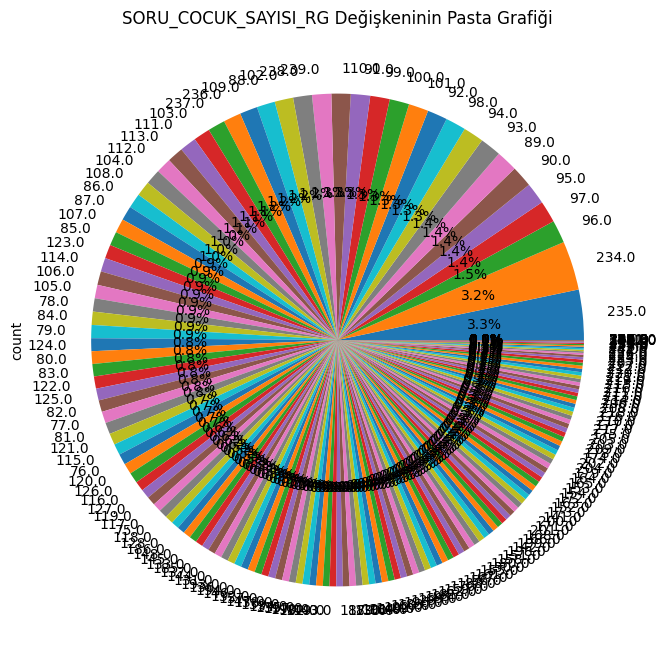

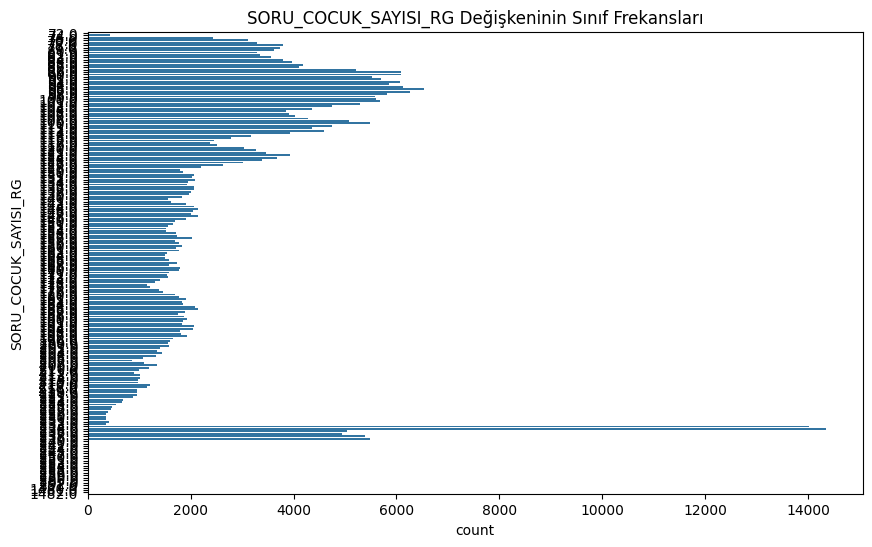

In [92]:
dataVisualization(train, "SORU_COCUK_SAYISI_RG")

In [93]:
# BES_AYRILMA_TALEP_ADET

In [94]:
descriptiveStatistics(train, "BES_AYRILMA_TALEP_ADET")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         8
top            0
freq      845024
Name: BES_AYRILMA_TALEP_ADET, dtype: int64


Değişkenimizin Sınıf Frekansları:
BES_AYRILMA_TALEP_ADET
0    845024
1      6788
2       781
3        97
4        24
5         3
7         1
8         1
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


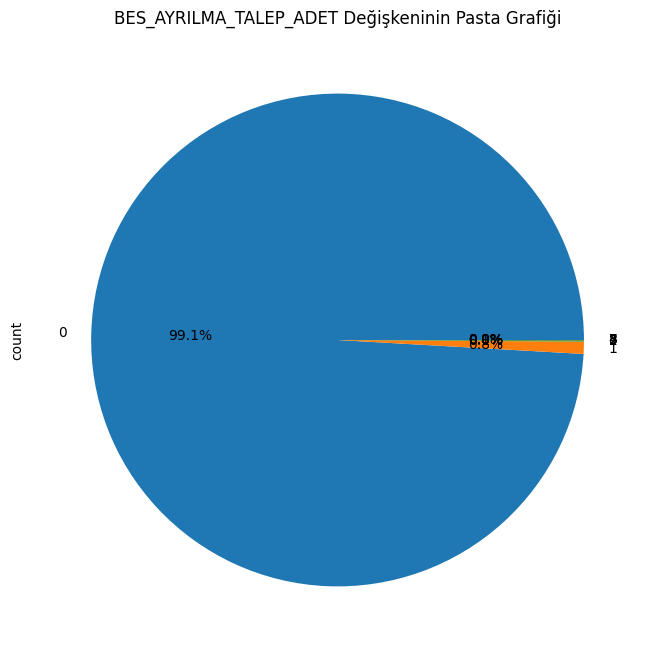

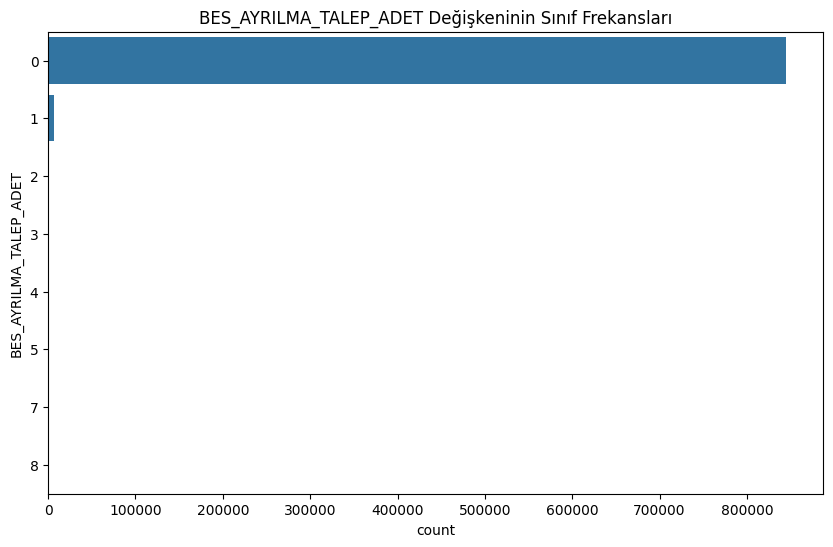

In [95]:
dataVisualization(train, "BES_AYRILMA_TALEP_ADET")

In [96]:
# ODEMEME_TALEP_ADET

In [98]:
descriptiveStatistics(train, "ODEMEME_TALEP_ADET")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         5
top            0
freq      852424
Name: ODEMEME_TALEP_ADET, dtype: int64


Değişkenimizin Sınıf Frekansları:
ODEMEME_TALEP_ADET
0    852424
1       251
2        36
3         7
4         1
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


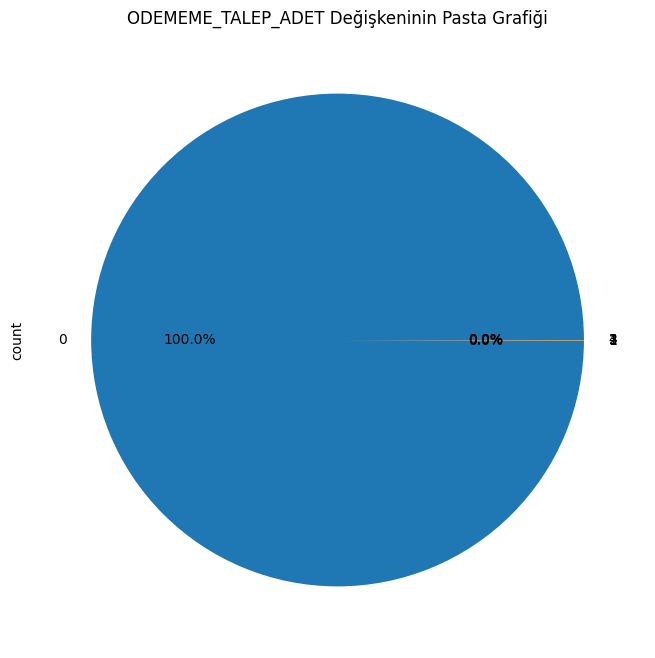

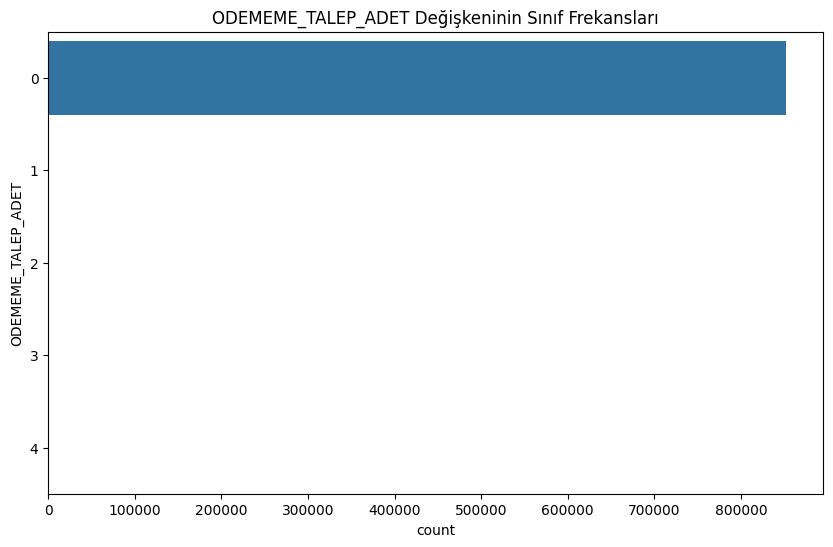

In [99]:
dataVisualization(train, "ODEMEME_TALEP_ADET")

In [100]:
# HAYAT_AYRILMA_TALEP_ADET

In [101]:
descriptiveStatistics(train, "HAYAT_AYRILMA_TALEP_ADET")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique         6
top            0
freq      852292
Name: HAYAT_AYRILMA_TALEP_ADET, dtype: int64


Değişkenimizin Sınıf Frekansları:
HAYAT_AYRILMA_TALEP_ADET
0    852292
1       379
2        43
4         3
3         1
5         1
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


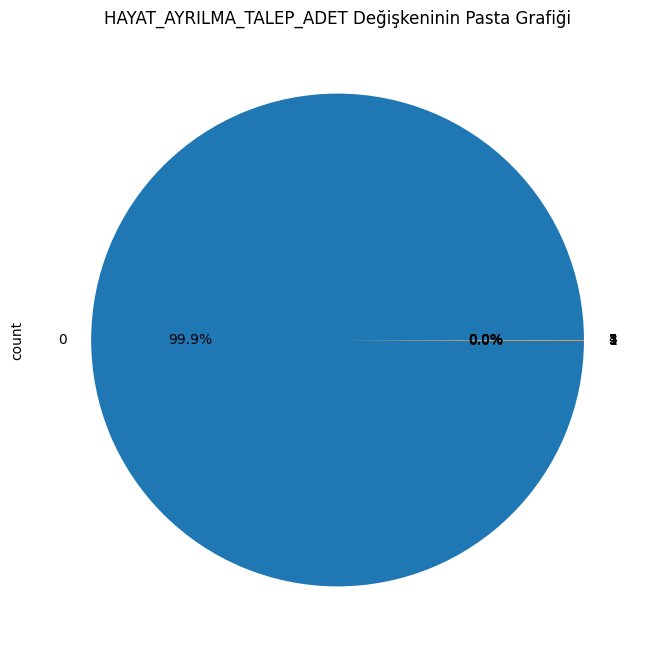

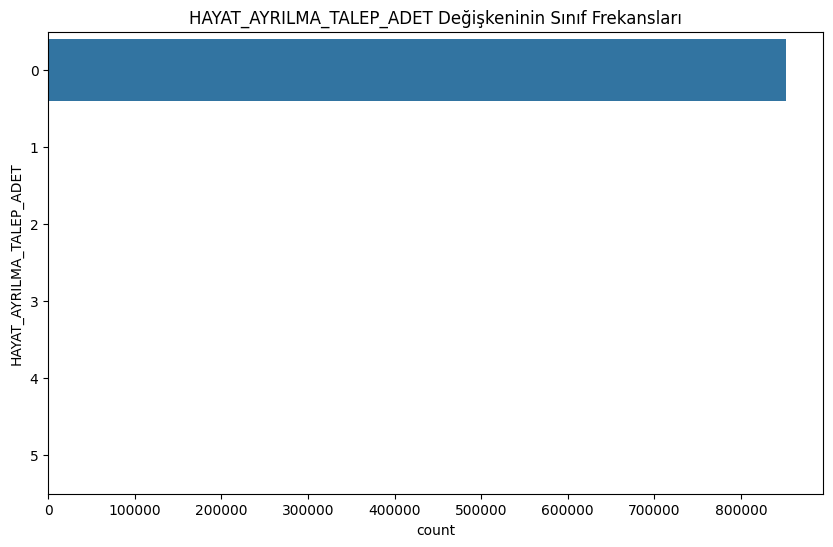

In [102]:
dataVisualization(train, "HAYAT_AYRILMA_TALEP_ADET")

In [103]:
# BILGI_TALEP_ADET

In [104]:
descriptiveStatistics(train, "BILGI_TALEP_ADET")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     852719
unique        13
top            0
freq      851585
Name: BILGI_TALEP_ADET, dtype: int64


Değişkenimizin Sınıf Frekansları:
BILGI_TALEP_ADET
0     851585
1        967
2         68
3         18
7         17
10        15
8         11
4          9
9          9
6          7
5          6
11         6
12         1
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


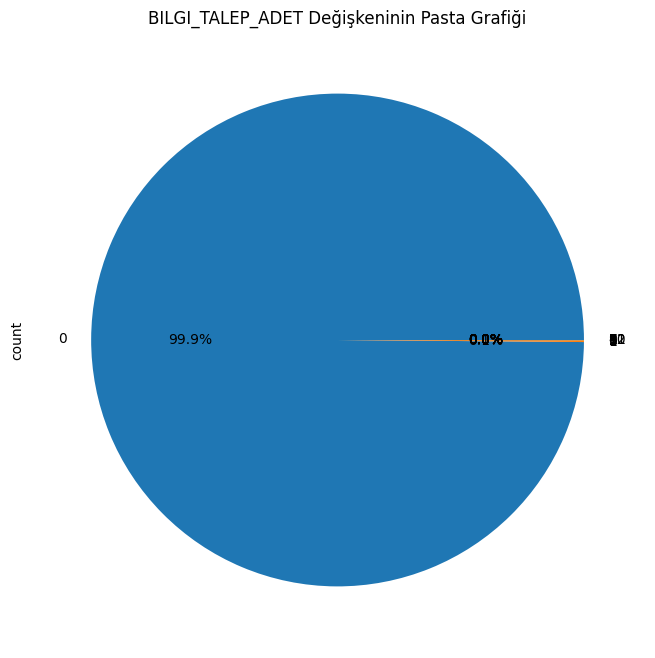

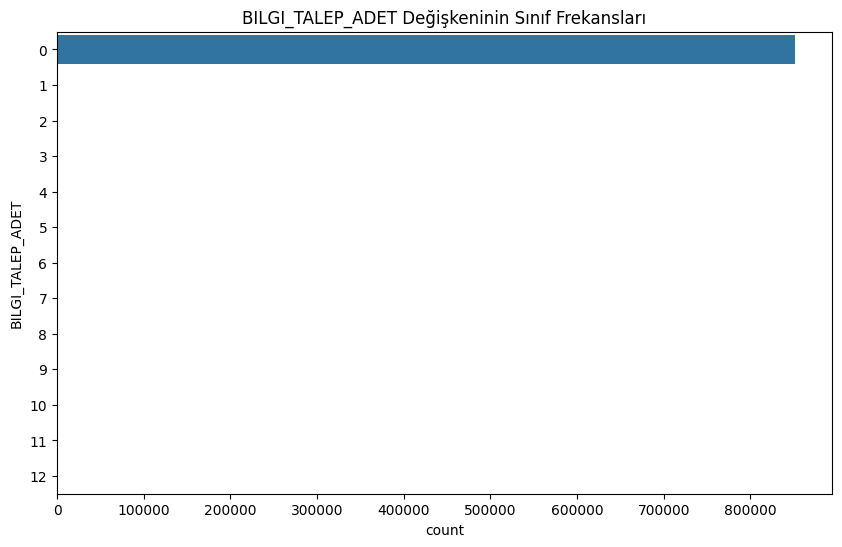

In [105]:
dataVisualization(train, "BILGI_TALEP_ADET")